In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import datetime
import time
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from myTools import *

# Import des fichiers

In [23]:
time1 = time.time()
#dfApplicationTest = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv',",")
dfApplicationTrain = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv',",")
#dfBureau = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv',",")
#dfBureauBalance = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv',",")
#dfPreviousAppliction = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv',",")
#dfPosCashBalance = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv',",")
#dfInstallmentsPayments = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv',",")
#dfCreditCardBalance = pd.read_csv(os.getcwd() + '/Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv',",")
time2 = time.time()
print(time2-time1)

1.9605162143707275


# Travail de application_train

In [24]:
pd.options.display.max_columns = 999
dfApplicationTrain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

1.3835420608520508


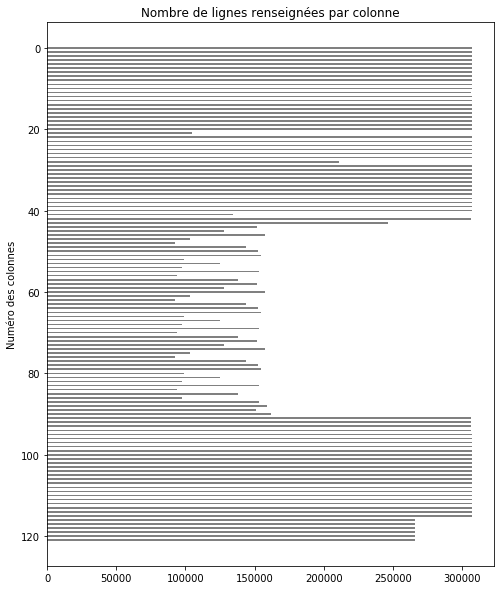

In [25]:
time1 = time.time()
myDf(dfApplicationTrain).ColCountLinesChart(typeChart='barh')
time2 = time.time()
print(time2-time1)

### Création d'un seul champ AMT_REQ_CREDIT_BUREAU

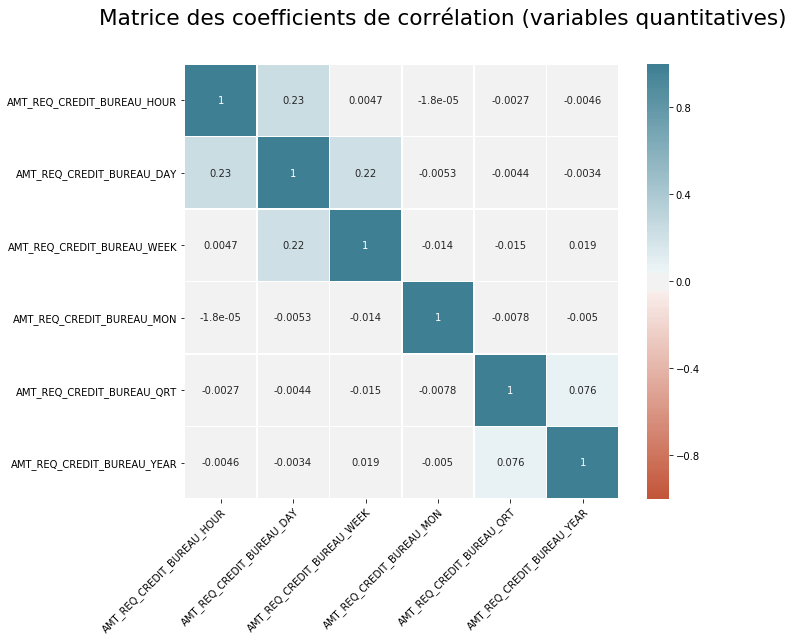

0.5519449710845947


In [26]:
time1 = time.time()
myDf(dfApplicationTrain).Stat(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], typeStat='biv',typeFeature='continue',bivThresholdCorr=2)
time2 = time.time()
print(time2-time1)

In [27]:
# tester cumuler
if False:
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_WEEK + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_MON + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_QRT + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_YEAR, axis=1)
    col_to_del = [
                    'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR'
    ]

    for col in col_to_del:
        del dfApplicationTrain[col]
        
else:
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU_DAY'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY, axis=1)
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU_WEEK'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_WEEK, axis=1)
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU_MON'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_WEEK + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_MON, axis=1)
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU_QRT'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_WEEK + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_MON + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_QRT, axis=1)
    dfApplicationTrain['AMT_REQ_CREDIT_BUREAU_YEAR'] = dfApplicationTrain.apply(lambda x: x.AMT_REQ_CREDIT_BUREAU_HOUR + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_DAY + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_WEEK + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_MON + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_QRT + \
                                                                                     x.AMT_REQ_CREDIT_BUREAU_YEAR, axis=1)

### Champs EXT_SOURCE

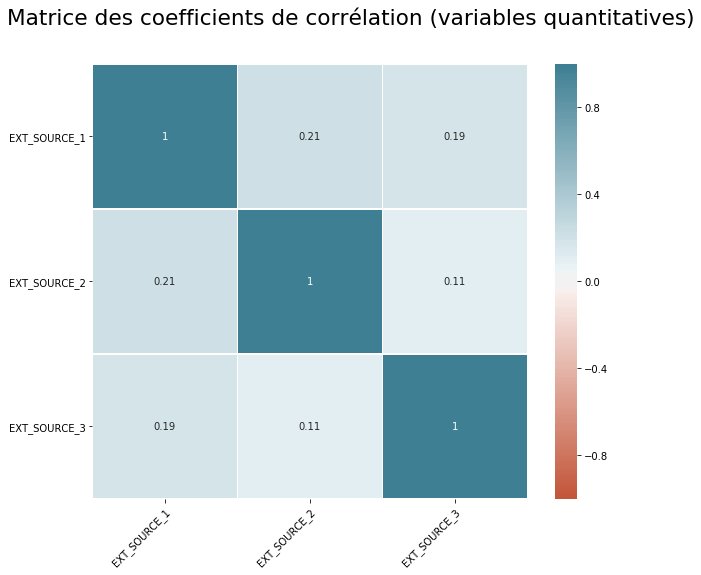

In [28]:
myDf(dfApplicationTrain).Stat(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'], typeStat='biv',typeFeature='continue',bivThresholdCorr=2)

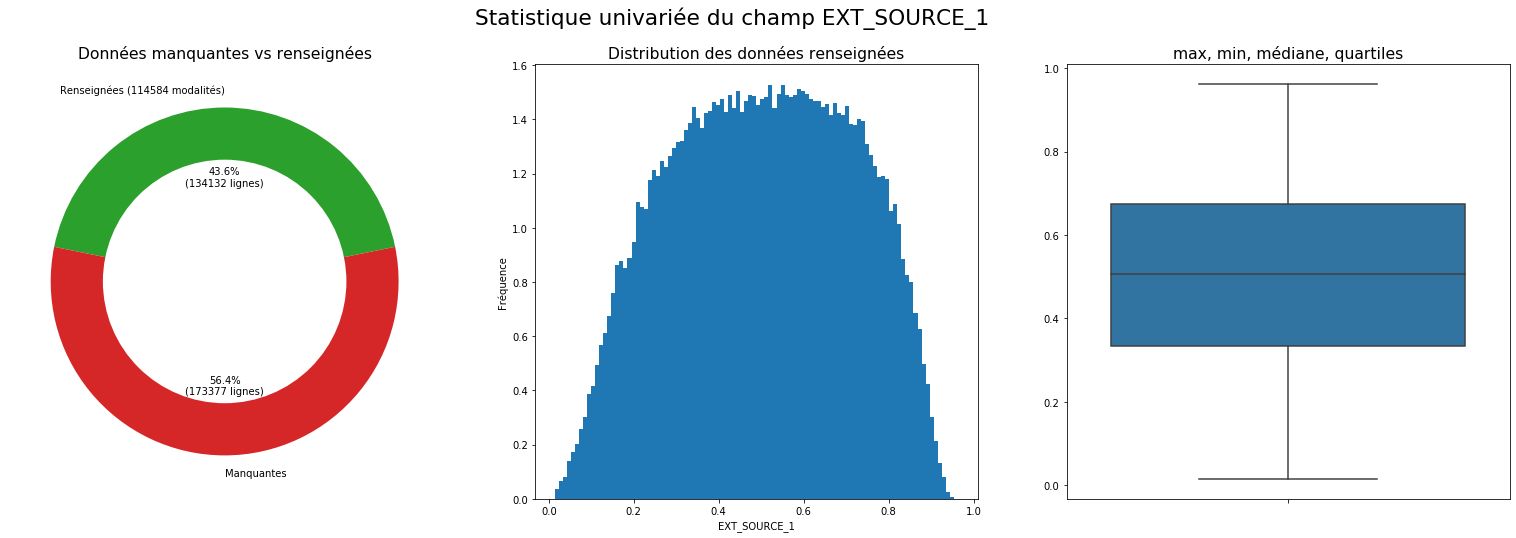

Mesures de position
 - Moyenne: 0.5
 - Médiane: 0.51
Mesures de dispertion
 - Ecart type: 0.21
 - Min: 0.01
 - Q25: 0.33
 - Q75: 0.68
 - Max: 0.96
Mesures de forme
 - Skewness (asymétrie): -0.07
 - Kurtosis (applatissement): -0.97


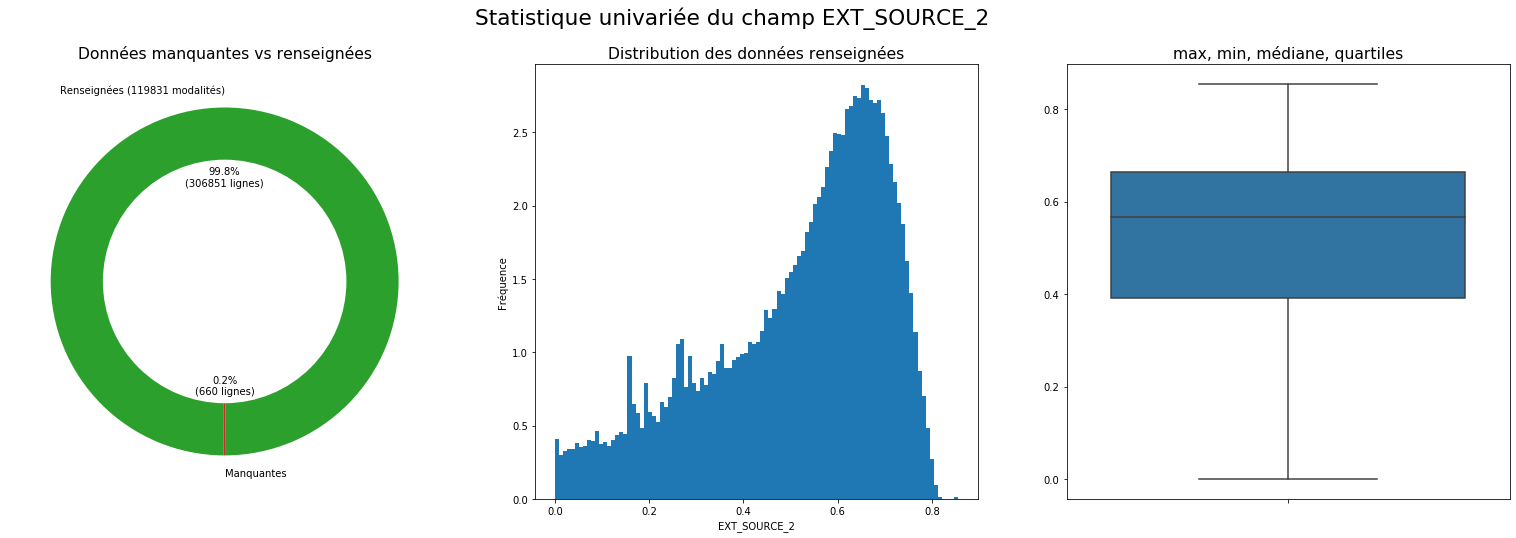

Mesures de position
 - Moyenne: 0.51
 - Médiane: 0.57
Mesures de dispertion
 - Ecart type: 0.19
 - Min: 0.0
 - Q25: 0.39
 - Q75: 0.66
 - Max: 0.85
Mesures de forme
 - Skewness (asymétrie): -0.79
 - Kurtosis (applatissement): -0.27


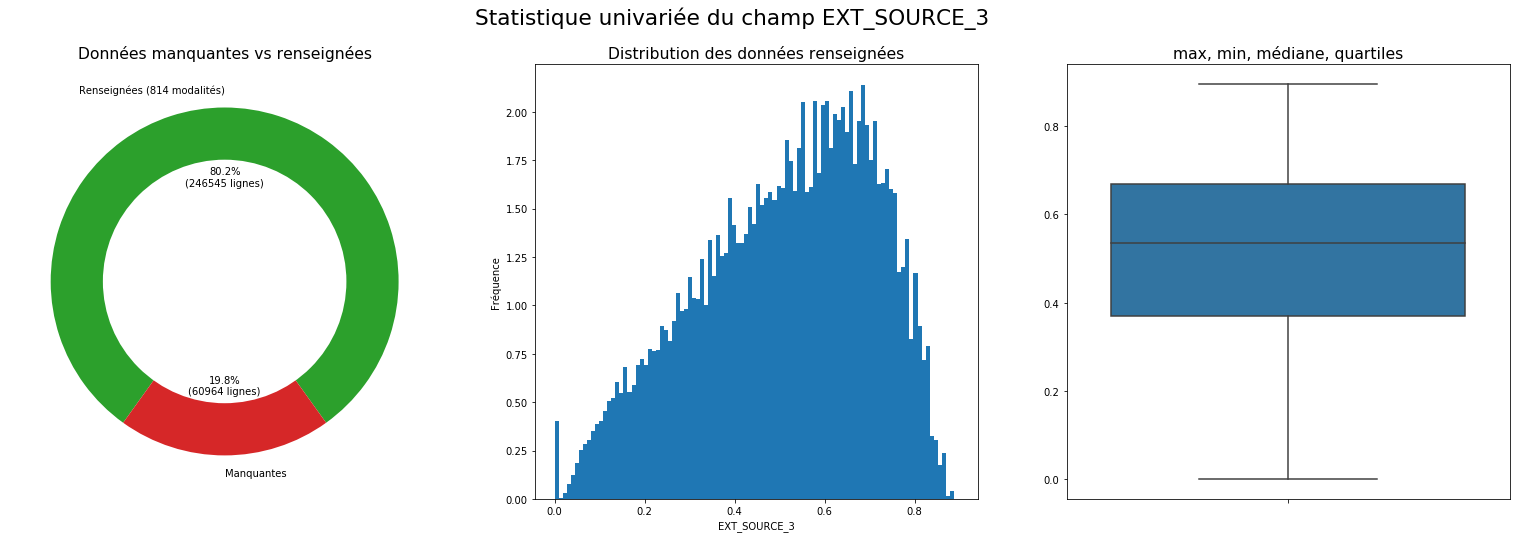

Mesures de position
 - Moyenne: 0.51
 - Médiane: 0.54
Mesures de dispertion
 - Ecart type: 0.19
 - Min: 0.0
 - Q25: 0.37
 - Q75: 0.67
 - Max: 0.9
Mesures de forme
 - Skewness (asymétrie): -0.41
 - Kurtosis (applatissement): -0.66


In [29]:
myDf(dfApplicationTrain).Stat(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'], typeStat='univ', statsNan=True)

### Champs OBS_CNT_SOCIAL_CIRCLE

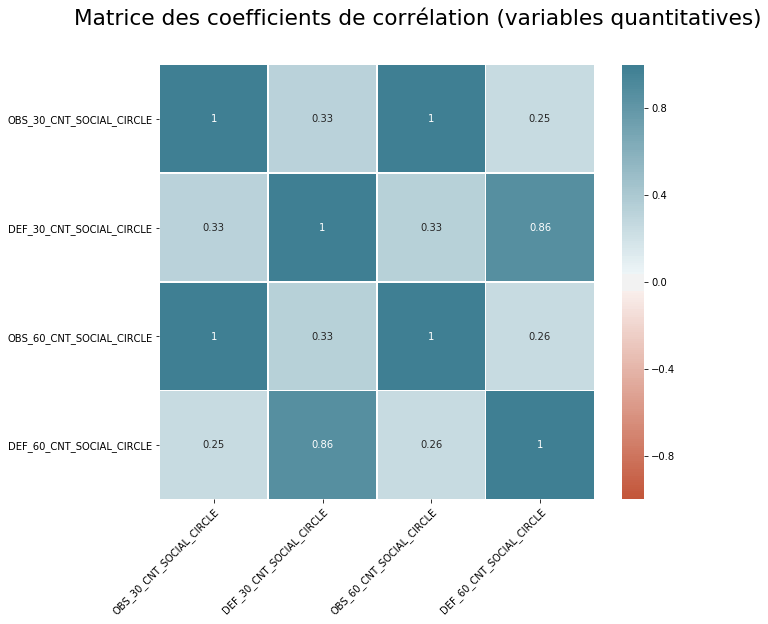

In [30]:
myDf(dfApplicationTrain).Stat(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], typeStat='biv',typeFeature='continue',bivThresholdCorr=2)

### Champs Car

In [31]:
dfApplicationTrain.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Lignes avec FLAG_OWN_CAR == 'Y' et OWN_CAR_AGE vide

In [32]:
len(dfApplicationTrain[dfApplicationTrain.OWN_CAR_AGE.isnull() & (dfApplicationTrain.FLAG_OWN_CAR == 'Y')])

5

In [33]:
# supprimer car 5 lignes seulement ou -1 ou 0
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.OWN_CAR_AGE.isnull() & (dfApplicationTrain.FLAG_OWN_CAR == 'Y')].index, "OWN_CAR_AGE"] = -1

Lignes avec FLAG_OWN_CAR == 'N'

In [34]:
dfApplicationTrain[dfApplicationTrain.FLAG_OWN_CAR == 'N'].OWN_CAR_AGE.unique()

array([nan])

In [35]:
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.OWN_CAR_AGE.isnull()].index, "OWN_CAR_AGE"] = -10

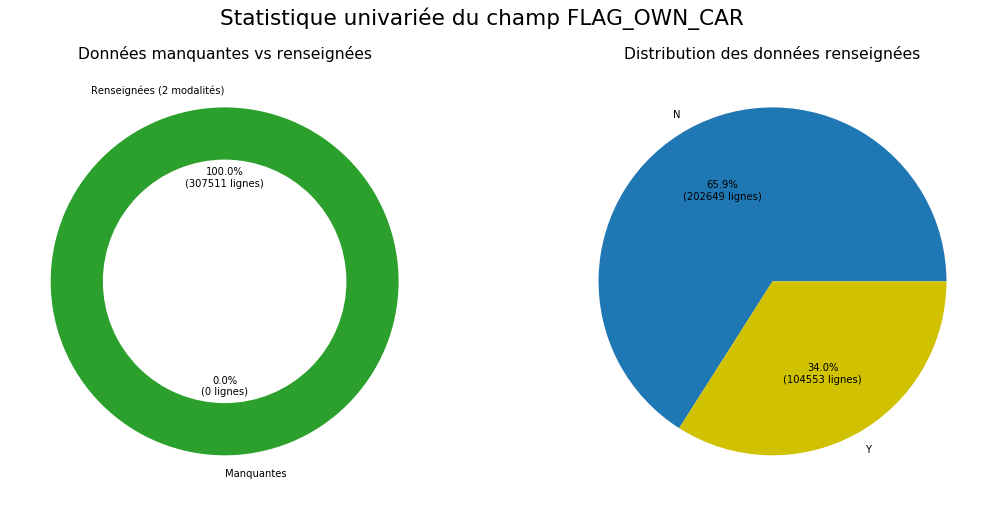

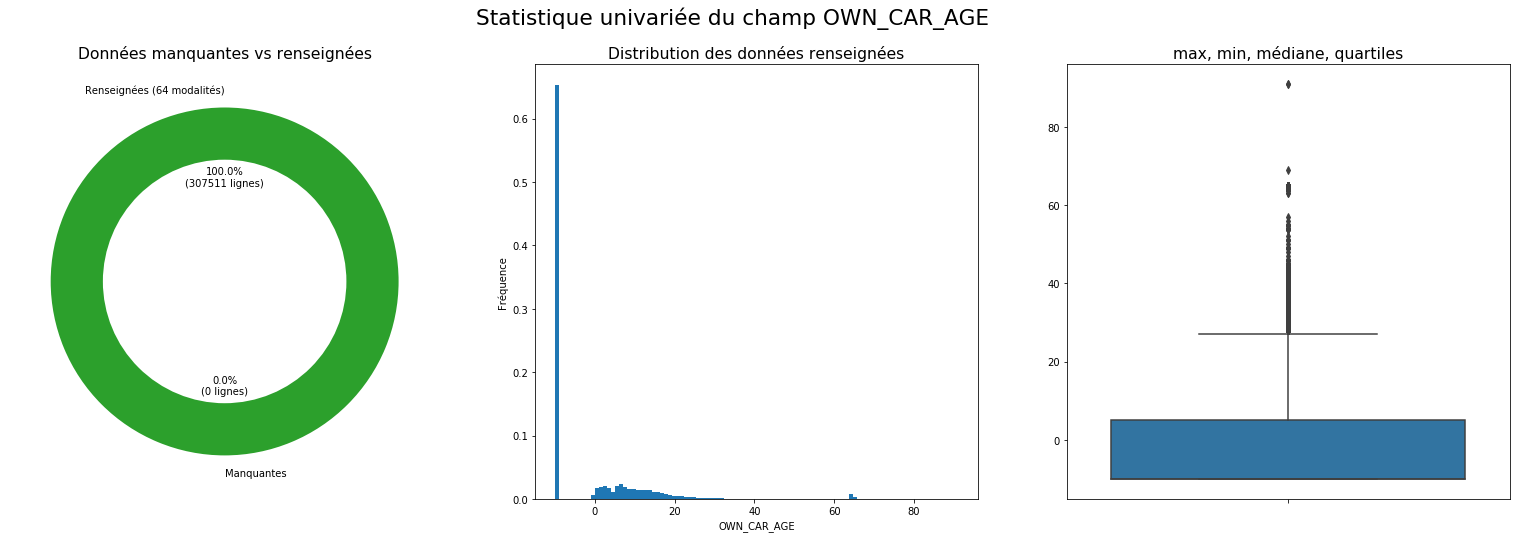

Mesures de position
 - Moyenne: -2.5
 - Médiane: -10.0
Mesures de dispertion
 - Ecart type: 12.56
 - Min: -10.0
 - Q25: -10.0
 - Q75: 5.0
 - Max: 91.0
Mesures de forme
 - Skewness (asymétrie): 2.26
 - Kurtosis (applatissement): 7.3


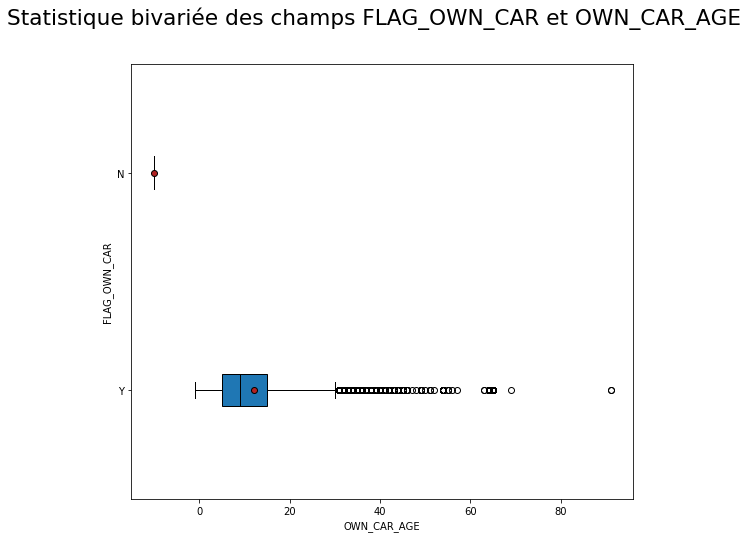

Rapport de corrélation entre FLAG_OWN_CAR et OWN_CAR_AGE: 0.6923867076026686


In [36]:
myDf(dfApplicationTrain).Stat(['FLAG_OWN_CAR','OWN_CAR_AGE'], statsNan=True)

### Champs children

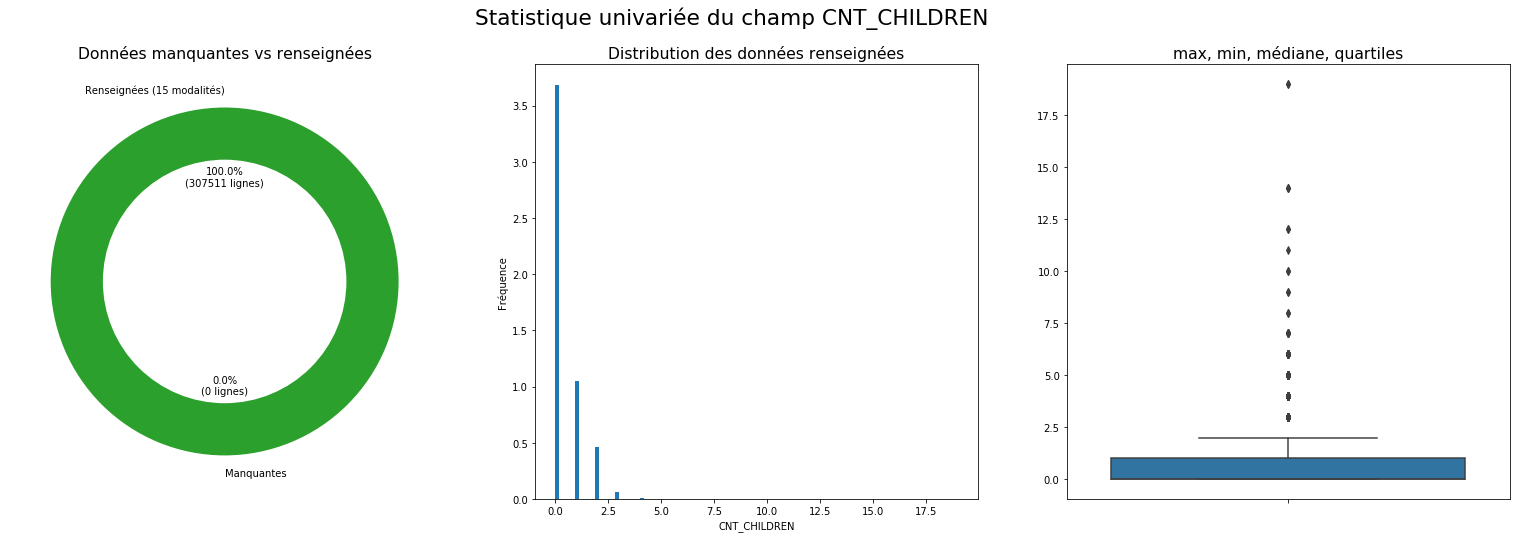

Mesures de position
 - Moyenne: 0.42
 - Médiane: 0.0
Mesures de dispertion
 - Ecart type: 0.72
 - Min: 0
 - Q25: 0.0
 - Q75: 1.0
 - Max: 19
Mesures de forme
 - Skewness (asymétrie): 1.97
 - Kurtosis (applatissement): 7.9


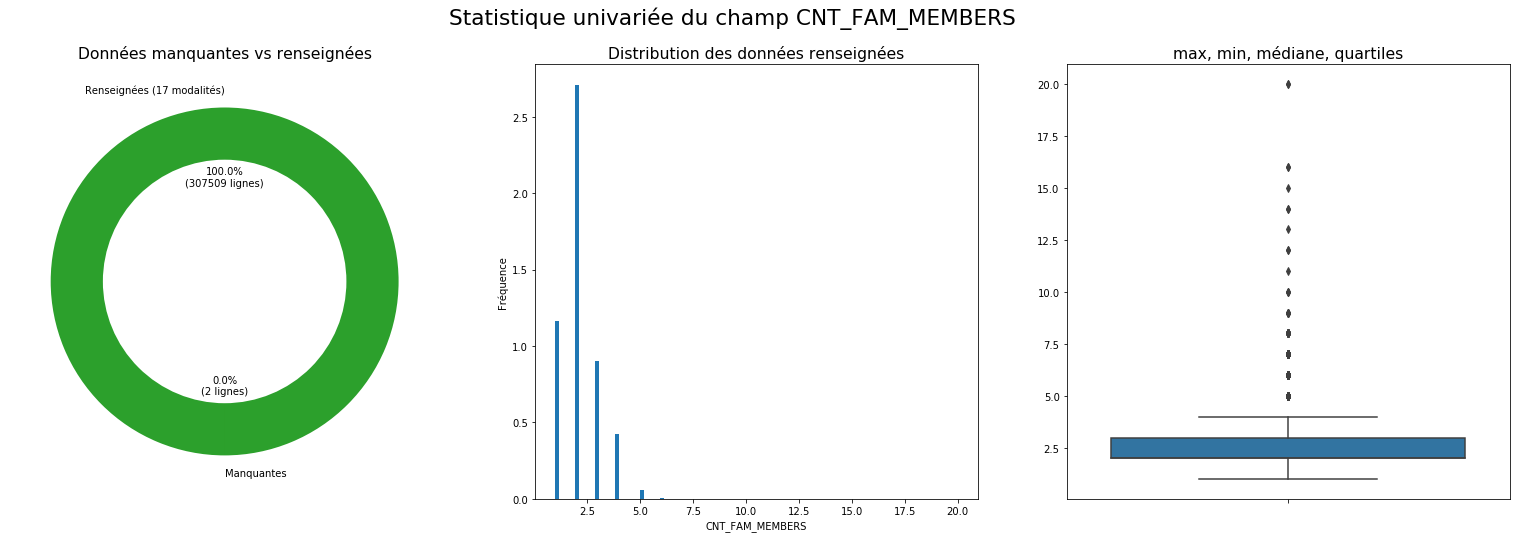

Mesures de position
 - Moyenne: 2.15
 - Médiane: 2.0
Mesures de dispertion
 - Ecart type: 0.91
 - Min: 1.0
 - Q25: 2.0
 - Q75: 3.0
 - Max: 20.0
Mesures de forme
 - Skewness (asymétrie): 0.99
 - Kurtosis (applatissement): 2.8


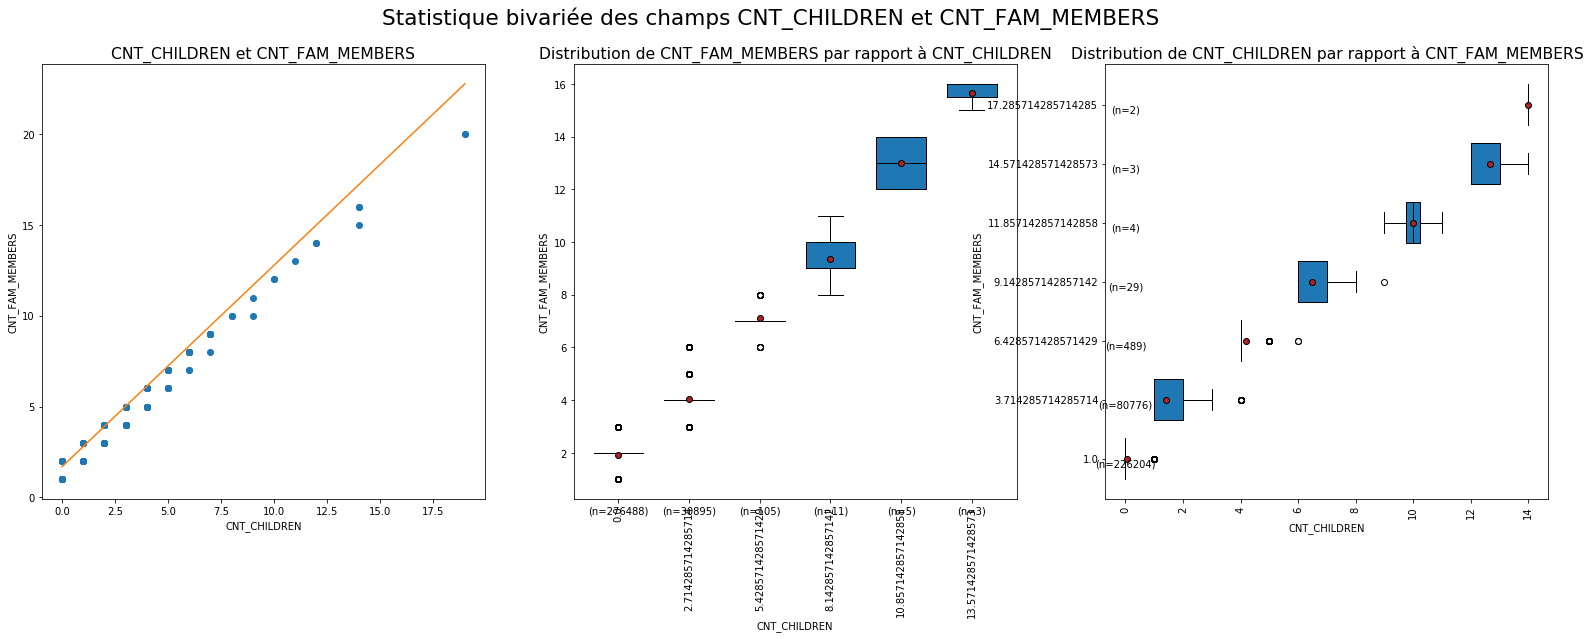

Covariance entre CNT_CHILDREN et CNT_FAM_MEMBERS : 0.5781553102891352 
Covariance débiaisée entre CNT_CHILDREN et CNT_FAM_MEMBERS : 0.5781571904200922 
Coefficient de correlation linéaire entre CNT_CHILDREN et CNT_FAM_MEMBERS : 0.8791606404389305 
Régression linéaire entre CNT_CHILDREN et CNT_FAM_MEMBERS: y = 1.1087244799458245x + 1.6902669609536167
Coefficient de détermination entre CNT_CHILDREN et CNT_FAM_MEMBERS : 0.7729234316969904 


In [37]:
myDf(dfApplicationTrain).Stat(['CNT_CHILDREN','CNT_FAM_MEMBERS'], statsNan=True, typeFeature='continue')

### Champs credit

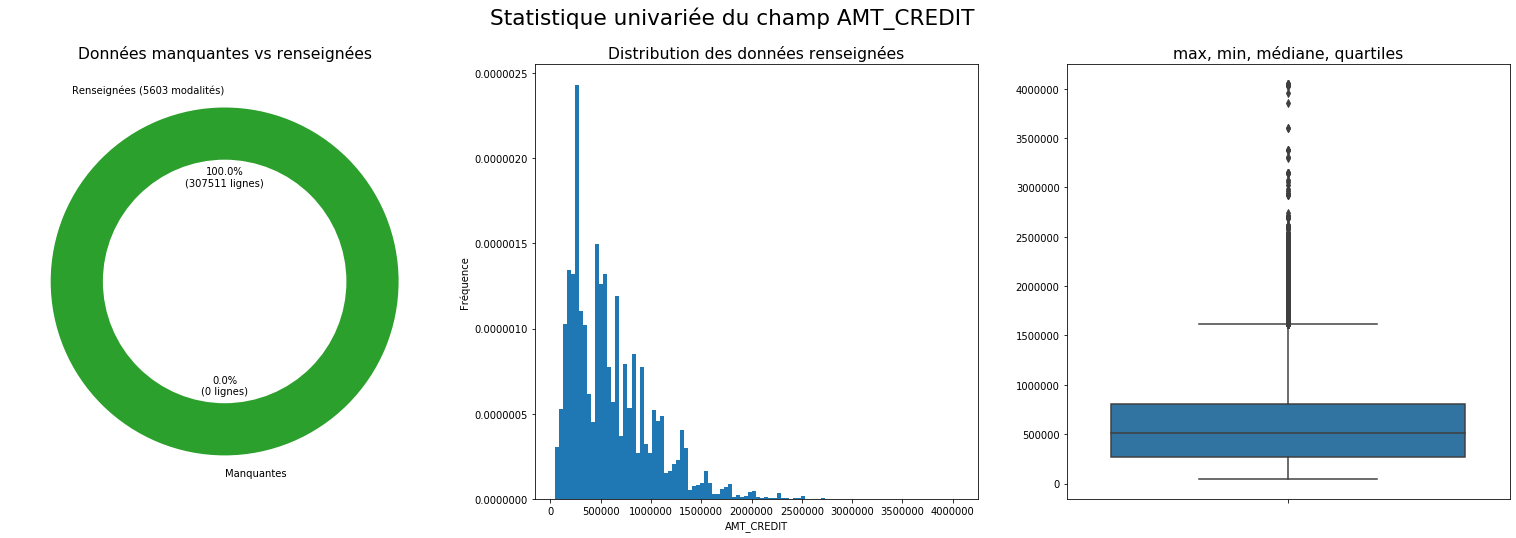

Mesures de position
 - Moyenne: 599026.0
 - Médiane: 513531.0
Mesures de dispertion
 - Ecart type: 402490.12
 - Min: 45000.0
 - Q25: 270000.0
 - Q75: 808650.0
 - Max: 4050000.0
Mesures de forme
 - Skewness (asymétrie): 1.23
 - Kurtosis (applatissement): 1.93


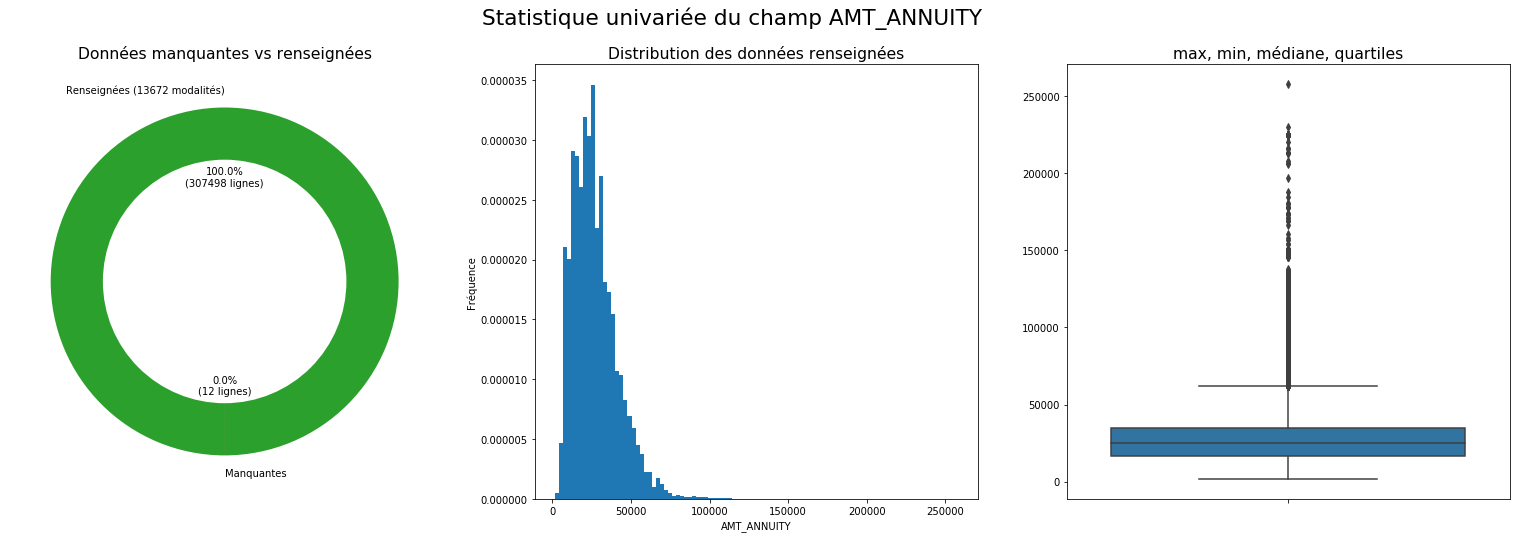

Mesures de position
 - Moyenne: 27108.57
 - Médiane: 24903.0
Mesures de dispertion
 - Ecart type: 14493.71
 - Min: 1615.5
 - Q25: 16524.0
 - Q75: 34596.0
 - Max: 258025.5
Mesures de forme
 - Skewness (asymétrie): 1.58
 - Kurtosis (applatissement): 7.71


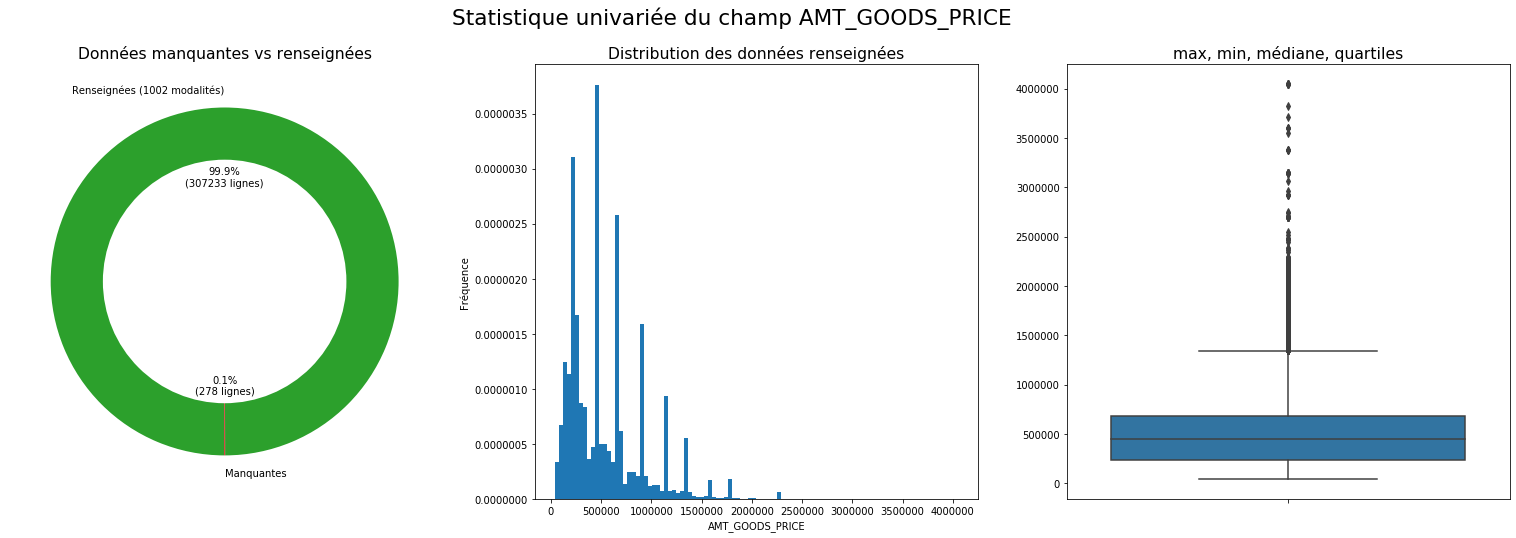

Mesures de position
 - Moyenne: 538396.21
 - Médiane: 450000.0
Mesures de dispertion
 - Ecart type: 369445.86
 - Min: 40500.0
 - Q25: 238500.0
 - Q75: 679500.0
 - Max: 4050000.0
Mesures de forme
 - Skewness (asymétrie): 1.35
 - Kurtosis (applatissement): 2.43


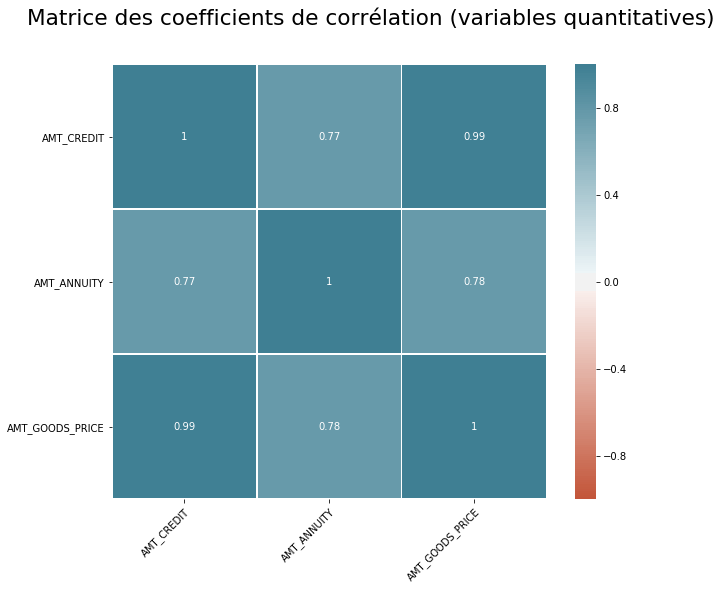

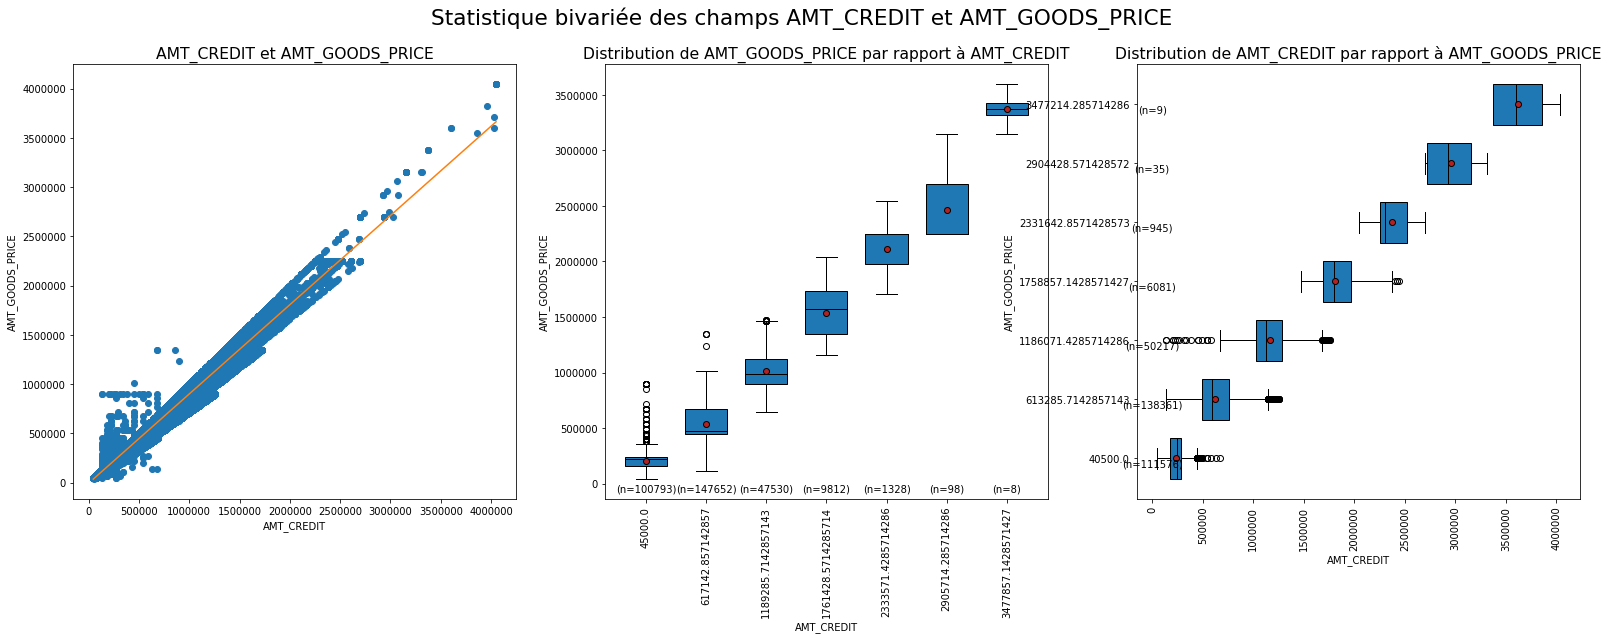

Covariance entre AMT_CREDIT et AMT_GOODS_PRICE : 146770339909.52548 
Covariance débiaisée entre AMT_CREDIT et AMT_GOODS_PRICE : 146770817627.79672 
Coefficient de correlation linéaire entre AMT_CREDIT et AMT_GOODS_PRICE : 0.9869683054221494 
Régression linéaire entre AMT_CREDIT et AMT_GOODS_PRICE: y = 0.9058780144266511x + -4510.0786217298055
Coefficient de détermination entre AMT_CREDIT et AMT_GOODS_PRICE : 0.9741064359078692 


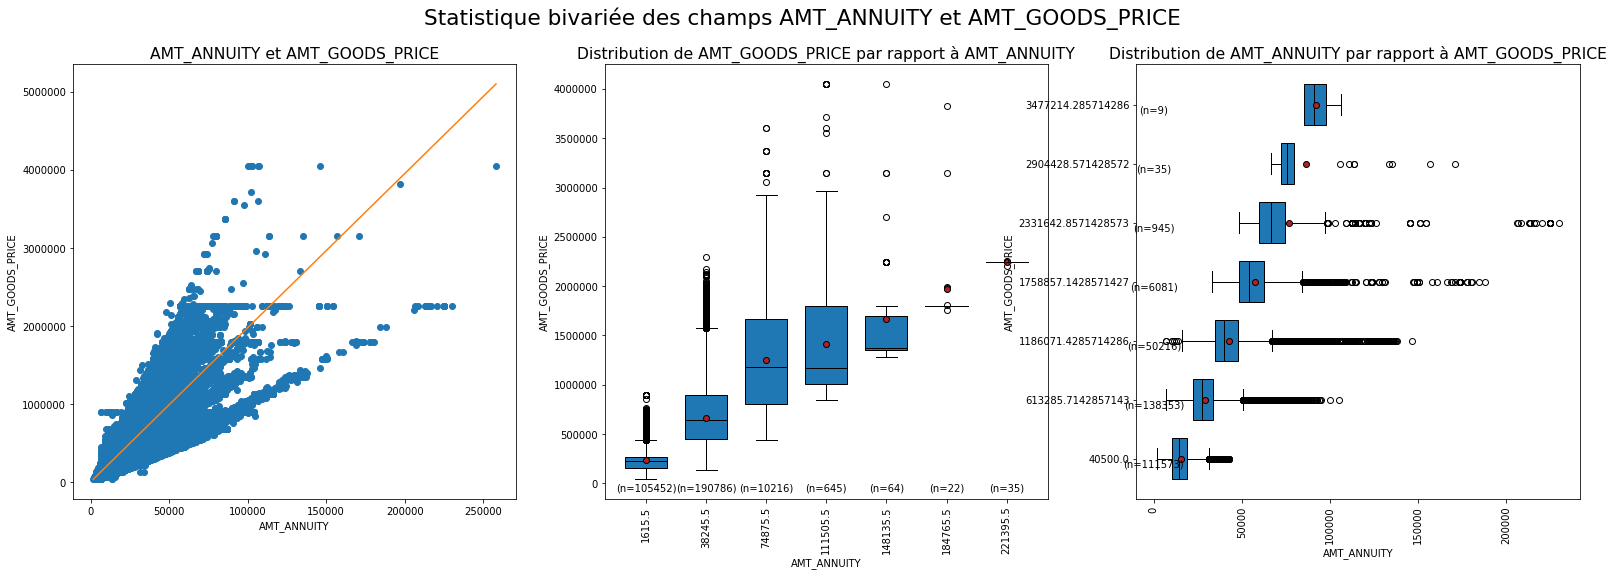

Covariance entre AMT_ANNUITY et AMT_GOODS_PRICE : 4149987609.876698 
Covariance débiaisée entre AMT_ANNUITY et AMT_GOODS_PRICE : 4150001118.071509 
Coefficient de correlation linéaire entre AMT_ANNUITY et AMT_GOODS_PRICE : 0.7751092733120245 
Régression linéaire entre AMT_ANNUITY et AMT_GOODS_PRICE: y = 19.759919056564826x + 2499.4025275467948
Coefficient de détermination entre AMT_ANNUITY et AMT_GOODS_PRICE : 0.6007943855742947 


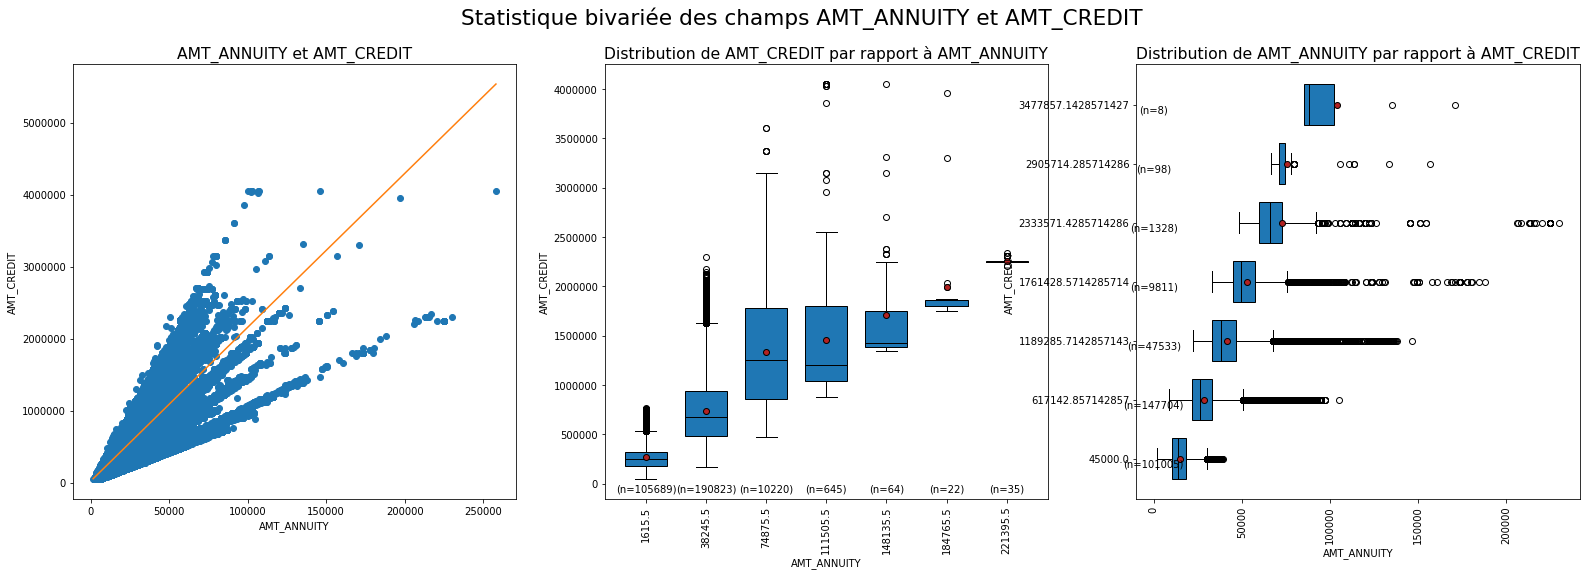

Covariance entre AMT_ANNUITY et AMT_CREDIT : 4492680083.748942 
Covariance débiaisée entre AMT_ANNUITY et AMT_CREDIT : 4492694694.185705 
Coefficient de correlation linéaire entre AMT_ANNUITY et AMT_CREDIT : 0.7701380033118814 
Régression linéaire entre AMT_ANNUITY et AMT_CREDIT: y = 21.38681609119083x + 19261.20865876018
Coefficient de détermination entre AMT_ANNUITY et AMT_CREDIT : 0.5931125441452115 


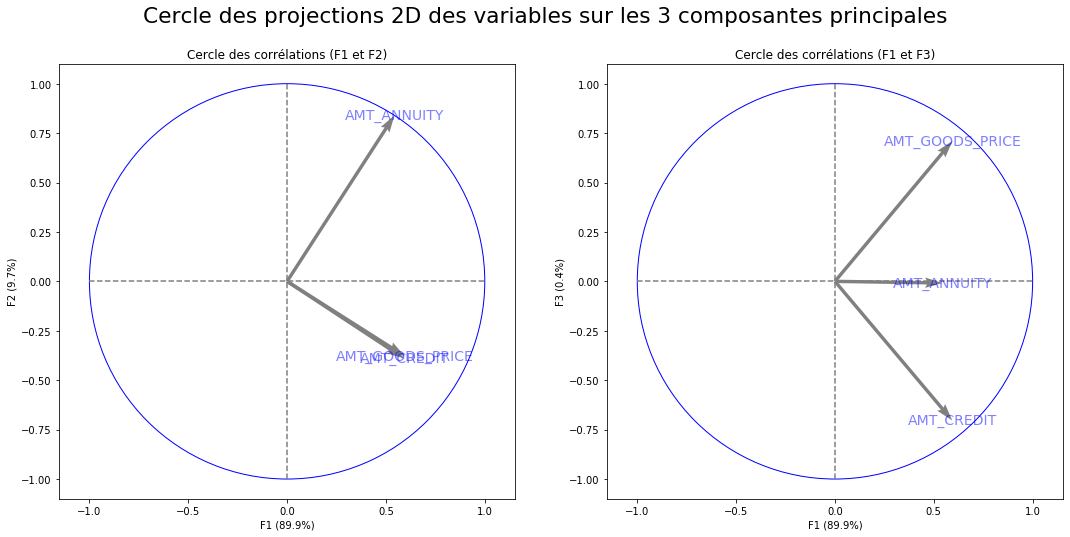

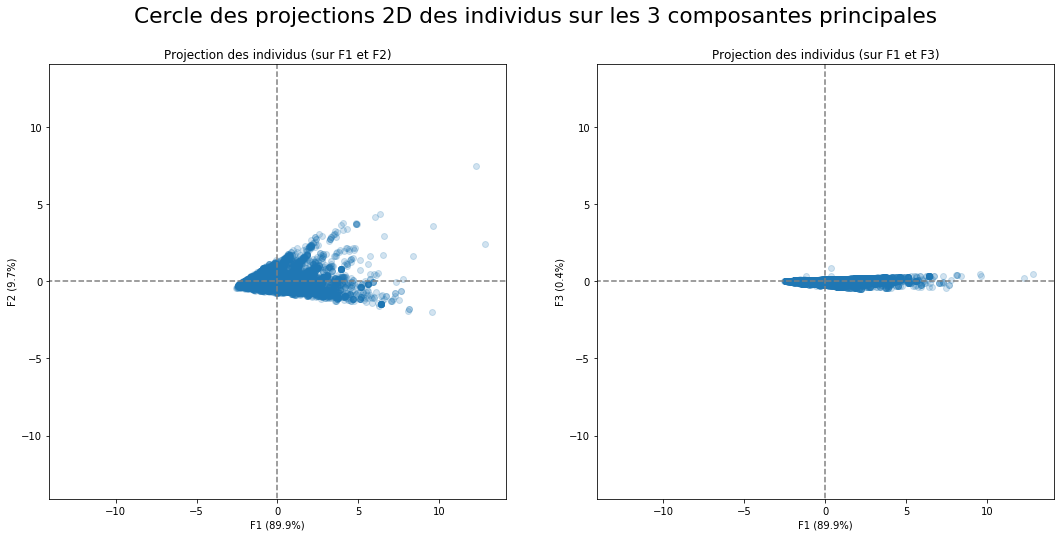

In [38]:
myDf(dfApplicationTrain).Stat(['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'], statsNan=True, typeFeature='continue')

### Champ gender

In [39]:
dfApplicationTrain.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [40]:
dfApplicationTrain = dfApplicationTrain[dfApplicationTrain.CODE_GENDER.isin(['F','M'])]

### Suppression de champs

In [41]:
ColCountLines = myDf(dfApplicationTrain).ColCountLines()
for i in np.arange(len(ColCountLines)):
    if (ColCountLines.values[i] < 200000) & (ColCountLines.index[i] not in ['OWN_CAR_AGE','EXT_SOURCE_1']):
        del dfApplicationTrain[ColCountLines.index[i]]

col_to_del = [
'FLAG_MOBIL', # Did client provide mobile phone
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',

# ininéressant
'NAME_TYPE_SUITE',  # Who was accompanying client when he was applying for the loan
'DAYS_ID_PUBLISH', # How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
'DAYS_REGISTRATION', # How many days before the application did client change his registration,time only relative to the application
'WEEKDAY_APPR_PROCESS_START', # On which day of the week did the client apply for the loan
'HOUR_APPR_PROCESS_START', # Approximately at what hour did the client apply for the loan,rounded
'DAYS_LAST_PHONE_CHANGE', # How many days before application did client change phone

# flags de comparaison de donnée
'REG_REGION_NOT_LIVE_REGION', # Flag if client's permanent address does not match contact address
'REG_REGION_NOT_WORK_REGION', # Flag if client's permanent address does not match contact address
'LIVE_REGION_NOT_WORK_REGION', # Flag if client's contact address does not match work address
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
    
    
#'AMT_REQ_CREDIT_BUREAU_HOUR',
#'AMT_REQ_CREDIT_BUREAU_DAY',
#'AMT_REQ_CREDIT_BUREAU_WEEK',
#'AMT_REQ_CREDIT_BUREAU_MON',
#'AMT_REQ_CREDIT_BUREAU_QRT',
#'AMT_REQ_CREDIT_BUREAU_YEAR',


# Corrélées à autre variable
'OBS_60_CNT_SOCIAL_CIRCLE', 
'DEF_60_CNT_SOCIAL_CIRCLE',
'FLAG_OWN_CAR',
'CNT_FAM_MEMBERS',
'AMT_ANNUITY',
'AMT_GOODS_PRICE'

# trop de valeurs
#'OCCUPATION_TYPE',
#'ORGANIZATION_TYPE'    
]



for col in col_to_del:
    del dfApplicationTrain[col]
    
for col in dfApplicationTrain:
    if col[0:13] == 'FLAG_DOCUMENT':  # Did client provide document
        del dfApplicationTrain[col]

### Champs nombre de jours

In [42]:
dfApplicationTrain['DAYS_BIRTH'] = - dfApplicationTrain['DAYS_BIRTH'] / 365
dfApplicationTrain['DAYS_EMPLOYED'] = - dfApplicationTrain['DAYS_EMPLOYED'] / 365

/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Statistiques sur les champs d'application_train

In [43]:
dfApplicationTrain.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [44]:
#myDf(dfApplicationTrain).Stat(typeStat='univ',exclCol=['SK_ID_CURR'],thresholdContinu=20,statsNan=True, pieThresholdVoidLabel=0,pieThresholdVoidModality=0,modalities=15)

### Gestion des outliers

#### AMT_INCOME_TOTAL_LOG

In [45]:
#dfApplicationTrain['AMT_INCOME_TOTAL_LOG'] = dfApplicationTrain.apply(lambda x: np.log(x.AMT_INCOME_TOTAL), axis=1)

#### DAYS_EMPLOYED

In [46]:
dfApplicationTrain[dfApplicationTrain.DAYS_EMPLOYED < 0].DAYS_EMPLOYED.value_counts()

-1000.665753    55374
Name: DAYS_EMPLOYED, dtype: int64

In [47]:
dfApplicationTrain['DAYS_EMPLOYED'] = dfApplicationTrain.apply(lambda x: np.where(x.DAYS_EMPLOYED < 0, -10, x.DAYS_EMPLOYED), axis=1)

/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Gestion des valeurs manquantes

In [48]:
dfApplicationTrain.isna().any()

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
OWN_CAR_AGE                    False
OCCUPATION_TYPE                 True
REGION_RATING_CLIENT           False
REGION_RATING_CLIENT_W_CITY    False
ORGANIZATION_TYPE              False
EXT_SOURCE_1                    True
EXT_SOURCE_2                    True
EXT_SOURCE_3                    True
OBS_30_CNT_SOCIAL_CIRCLE        True
DEF_30_CNT_SOCIAL_CIRCLE        True
AMT_REQ_CREDIT_BUREAU_HOUR      True
AMT_REQ_CREDIT_BUREAU_DAY       True
A

In [49]:
dfApplicationTrain.at[dfApplicationTrain.OCCUPATION_TYPE.isnull(), 'OCCUPATION_TYPE'] = 'missing'
dfApplicationTrain.at[dfApplicationTrain.ORGANIZATION_TYPE.isnull(), 'ORGANIZATION_TYPE'] = 'missing'

/home/pierre/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
model_dist = False

In [51]:
if model_dist:
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_HOUR.isnull(), 'AMT_REQ_CREDIT_BUREAU_HOUR'] = 0
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_DAY.isnull(), 'AMT_REQ_CREDIT_BUREAU_DAY'] = 0
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_WEEK.isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK'] = 0
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_MON.isnull(), 'AMT_REQ_CREDIT_BUREAU_MON'] = 0
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_QRT.isnull(), 'AMT_REQ_CREDIT_BUREAU_QRT'] = 0
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_YEAR.isnull(), 'AMT_REQ_CREDIT_BUREAU_YEAR'] = 0
    dfApplicationTrain.at[dfApplicationTrain.DEF_30_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE'] = 0
    dfApplicationTrain.at[dfApplicationTrain.OBS_30_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_30_CNT_SOCIAL_CIRCLE'] = 0
    del dfApplicationTrain['EXT_SOURCE_1']
    dfApplicationTrain['EXT_SOURCE_2'].fillna((dfApplicationTrain['EXT_SOURCE_2'].mean()), inplace=True)
    dfApplicationTrain['EXT_SOURCE_3'].fillna((dfApplicationTrain['EXT_SOURCE_3'].mean()), inplace=True)
else:
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_HOUR.isnull(), 'AMT_REQ_CREDIT_BUREAU_HOUR'] =-1
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_DAY.isnull(), 'AMT_REQ_CREDIT_BUREAU_DAY'] = -1
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_WEEK.isnull(), 'AMT_REQ_CREDIT_BUREAU_WEEK'] = -1
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_MON.isnull(), 'AMT_REQ_CREDIT_BUREAU_MON'] = -1
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_QRT.isnull(), 'AMT_REQ_CREDIT_BUREAU_QRT'] = -1
    dfApplicationTrain.at[dfApplicationTrain.AMT_REQ_CREDIT_BUREAU_YEAR.isnull(), 'AMT_REQ_CREDIT_BUREAU_YEAR'] = -1
    dfApplicationTrain.at[dfApplicationTrain.DEF_30_CNT_SOCIAL_CIRCLE.isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE'] = -1
    dfApplicationTrain.at[dfApplicationTrain.OBS_30_CNT_SOCIAL_CIRCLE.isnull(), 'OBS_30_CNT_SOCIAL_CIRCLE'] = -1
    dfApplicationTrain['EXT_SOURCE_1'].fillna(-1, inplace=True)
    dfApplicationTrain['EXT_SOURCE_2'].fillna(-1, inplace=True)
    dfApplicationTrain['EXT_SOURCE_3'].fillna(-1, inplace=True)

/home/pierre/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Encoding des variables catégorielles

### Variables binaires

In [52]:
time1 = time.time()
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dfApplicationTrain['NAME_CONTRACT_TYPE_ENCODED'] = ordinal_encoder.fit_transform(dfApplicationTrain[['NAME_CONTRACT_TYPE']])
dfApplicationTrain['CODE_GENDER_ENCODED'] = ordinal_encoder.fit_transform(dfApplicationTrain[['CODE_GENDER']])
dfApplicationTrain['FLAG_OWN_REALTY_ENCODED'] = ordinal_encoder.fit_transform(dfApplicationTrain[['FLAG_OWN_REALTY']])
time2 = time.time()
print(time2-time1)

/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0.17421507835388184


/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Variable ordonnable

In [53]:
dfApplicationTrain['NAME_EDUCATION_TYPE_ENCODED'] = 0
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_EDUCATION_TYPE == 'Academic degree'].index, "NAME_EDUCATION_TYPE_ENCODED"] = 1
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_EDUCATION_TYPE == 'Higher education'].index, "NAME_EDUCATION_TYPE_ENCODED"] = 2
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_EDUCATION_TYPE == 'Incomplete higher'].index, "NAME_EDUCATION_TYPE_ENCODED"] = 3
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_EDUCATION_TYPE == 'Secondary / secondary special'].index, "NAME_EDUCATION_TYPE_ENCODED"] = 4
dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_EDUCATION_TYPE == 'Lower secondary'].index, "NAME_EDUCATION_TYPE_ENCODED"] = 5

/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/pierre/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Variables à encoder

#### Family status -> flag married

In [54]:
dfApplicationTrain.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [55]:
# teste aussi one hot encoded
if False:
    dfApplicationTrain['MARRIED_FLAG'] = 0
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Married'].index, "SINGLE_FLAG"] = 0
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Civil marriage'].index, "SINGLE_FLAG"] = 0
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Single / not married'].index, "SINGLE_FLAG"] = 1
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Separated'].index, "SINGLE_FLAG"] = 1
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Widow'].index, "SINGLE_FLAG"] = 1
    dfApplicationTrain.at[dfApplicationTrain[dfApplicationTrain.NAME_FAMILY_STATUS == 'Unknown'].index, "SINGLE_FLAG"] = 1

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dfApplicationTrain['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(dfApplicationTrain[['NAME_FAMILY_STATUS']])

/home/pierre/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


#### Autres

In [56]:
from sklearn.preprocessing import LabelEncoder

if model_dist:
    dfApplicationTrain = pd.concat([dfApplicationTrain, pd.get_dummies(dfApplicationTrain['NAME_INCOME_TYPE'])], axis = 1)
    dfApplicationTrain = pd.concat([dfApplicationTrain, pd.get_dummies(dfApplicationTrain['NAME_HOUSING_TYPE'])], axis = 1)
    dfApplicationTrain = pd.concat([dfApplicationTrain, pd.get_dummies(dfApplicationTrain['OCCUPATION_TYPE'])], axis = 1)
    dfApplicationTrain = pd.concat([dfApplicationTrain, pd.get_dummies(dfApplicationTrain['ORGANIZATION_TYPE'])], axis = 1)
else:
    label_encoder = LabelEncoder()
    dfApplicationTrain['NAME_INCOME_TYPE'] = label_encoder.fit_transform(dfApplicationTrain[['NAME_INCOME_TYPE']])
    dfApplicationTrain['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(dfApplicationTrain[['NAME_HOUSING_TYPE']])
    dfApplicationTrain['OCCUPATION_TYPE'] = label_encoder.fit_transform(dfApplicationTrain[['OCCUPATION_TYPE']])
    dfApplicationTrain['ORGANIZATION_TYPE'] = label_encoder.fit_transform(dfApplicationTrain[['ORGANIZATION_TYPE']])

/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

### Conservation des variables numériques uniquement

In [57]:
col_type = dfApplicationTrain.dtypes
col_type = col_type[(col_type == 'int64') | (col_type == 'uint8') | (col_type == 'float64')]
dfApplicationTrain = dfApplicationTrain[col_type.index]

### Vérification NaN

In [58]:
col_nan = dfApplicationTrain.isna().any()
col_nan[col_nan==True]

Series([], dtype: bool)

### Sauvegarde

In [59]:
import pickle
with open('dfApplicationTrain', 'wb') as fichier:
    mon_pickler = pickle.Pickler(fichier)
    mon_pickler.dump(dfApplicationTrain)